### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [132]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

dist = sp.stats.gamma(a =1)
sample = dist.rvs(size = 1000)
print("Campione: ")
sample

Campione: 


array([3.16086350e-01, 1.81236968e+00, 9.67483895e-01, 9.46657075e-02,
       1.66051028e-01, 1.18485129e+00, 5.94249848e-01, 1.15566198e-03,
       7.05681203e-01, 2.35785853e+00, 1.02668000e-01, 1.87061330e-01,
       4.73361125e-01, 4.27420662e-01, 3.87644406e+00, 2.10532765e-01,
       1.59668292e-01, 1.53785017e-01, 8.44465331e-01, 2.98146421e+00,
       4.40106020e-01, 2.17971153e-01, 2.85757569e-01, 2.04881557e+00,
       1.40840536e-01, 2.14283904e-01, 5.29838971e-01, 2.03470589e+00,
       1.27797398e+00, 6.27189259e-01, 4.02221978e-01, 1.20098566e+00,
       1.12488327e+00, 1.22127464e+00, 3.61555122e-01, 6.29351723e-01,
       1.47993578e+00, 2.15979174e+00, 1.58630871e+00, 4.08849173e-01,
       5.63815382e-01, 6.99498070e-01, 1.00059255e+00, 5.38779489e-01,
       6.98467516e-01, 1.81395609e-02, 3.22033038e+00, 7.46911210e-01,
       1.19622843e+00, 9.39295371e-01, 1.09086865e+00, 1.23915594e+00,
       1.67715820e+00, 3.88509684e-02, 6.15810003e-01, 3.46920986e+00,
      

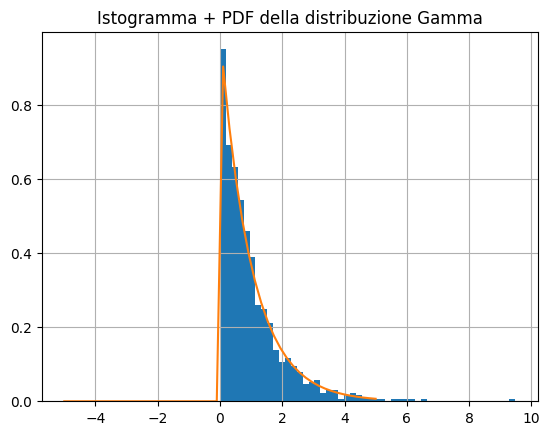

In [129]:
x = np.linspace(-5, 5)

plt.hist(sample, bins=50, density=True)
plt.title("Istogramma + PDF della distribuzione Gamma")
plt.plot(x, dist.pdf(x), label= "PDF")
plt.grid()
plt.show()

In [128]:
b = sp.stats.gamma.fit(sample)
print("Parametri del campione:")
b

Parametri del campione:


(np.float64(0.8614978254097705),
 np.float64(0.001228662190486315),
 np.float64(1.2370486456527128))

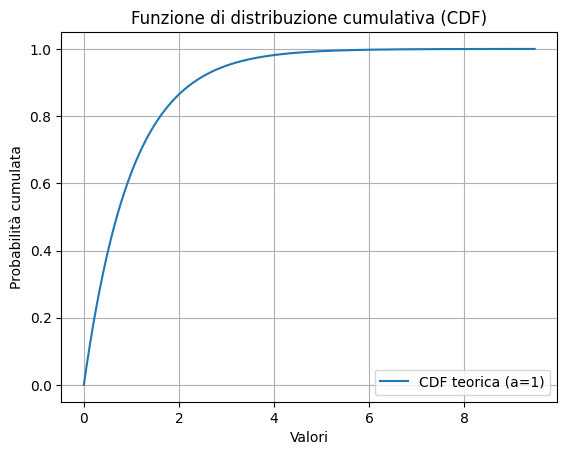

In [127]:
x = np.linspace(0, max(sample), 1000)

plt.plot(x, dist.cdf(x), label='CDF teorica (a=1)')
plt.title('Funzione di distribuzione cumulativa (CDF)')
plt.xlabel('Valori')
plt.ylabel('Probabilità cumulata')
plt.grid(True)
plt.legend()
plt.show()

In [126]:
print(f"Varianza del campione: {np.var(sample, ddof=1):.3f}")

Varianza del campione: 1.034


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

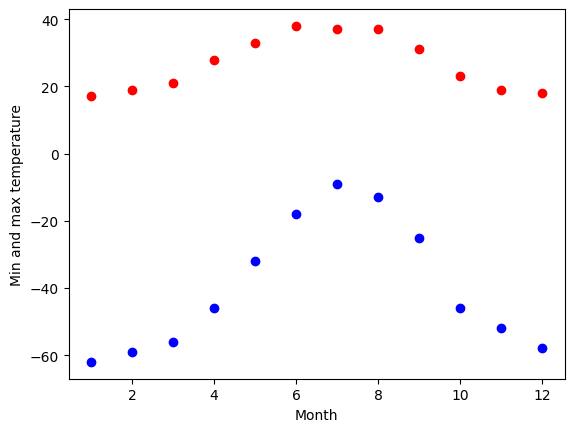

In [125]:
import numpy as np
import matplotlib.pyplot as plt

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1,13)

plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


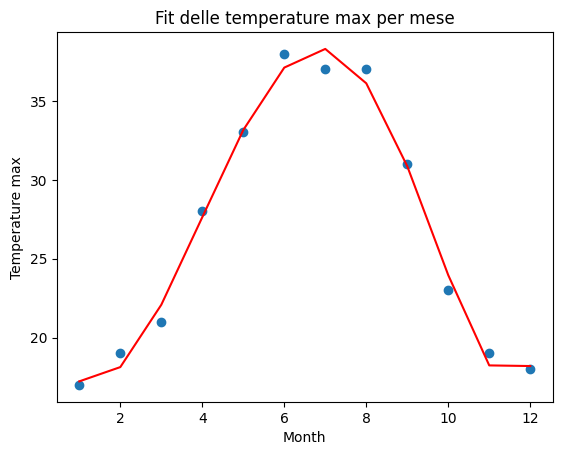

In [124]:
coef_mod = np.polyfit(months, temp_max, deg= 5)
temp_max_pred = np.polyval(coef_mod, months)

plt.scatter(months, temp_max)
plt.plot(months, temp_max_pred, color="red")
plt.title("Fit delle temperature max per mese")
plt.xlabel("Month")
plt.ylabel("Temperature max")
plt.show()

In [ ]:
mae1 = np.sum(np.abs(temp_max-temp_max_pred))/len(temp_max)
rmse1 = np.sqrt(np.sum((temp_max-temp_max_pred)**2)/len(temp_max))
print("Temp max:")
print(f"MAE= {mae1:.3f}, MRSE= {rmse1:.3f}")
http://127.0.0.1:8052

Temp max:
MAE= 0.652, MRSE= 0.760


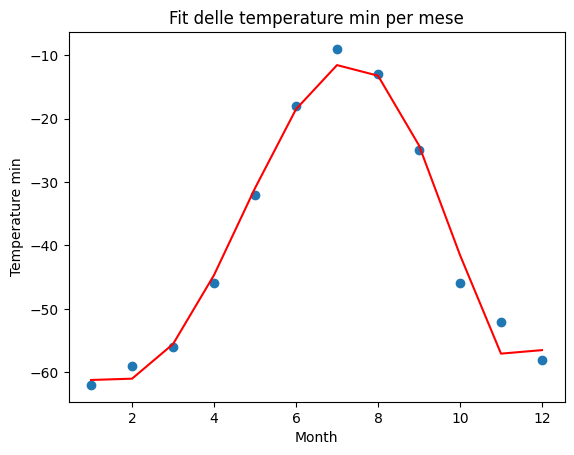

In [122]:
coef_mod1 = np.polyfit(months, temp_min, deg= 5)
temp_min_pred = np.polyval(coef_mod1, months)

plt.scatter(months, temp_min)
plt.plot(months, temp_min_pred, color="red")
plt.title("Fit delle temperature min per mese")
plt.xlabel("Month")
plt.ylabel("Temperature min")
plt.show()

In [121]:
mae2 = np.sum(np.abs(temp_min-temp_min_pred))/len(temp_min)
rmse2 = np.sqrt(np.sum((temp_min-temp_min_pred)**2)/len(temp_min))
print("Temp min:")
print(f"MAE= {mae2:.3f}, MRSE= {rmse2:.3f}")

Temp min:
MAE= 1.727, MRSE= 2.294


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [119]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df.head(10)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


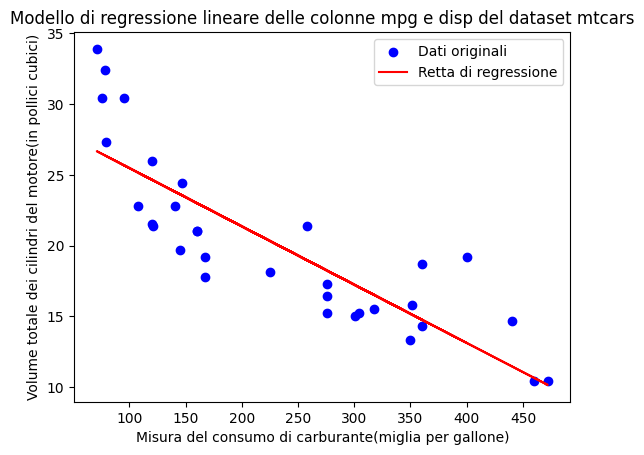

In [120]:
mod = sp.stats.linregress(df["disp"], df["mpg"])
fit_mod = mod.slope*df["disp"]+mod.intercept

plt.scatter(df["disp"], df["mpg"], label="Dati originali", color="blue")
plt.plot(df["disp"],fit_mod, label="Retta di regressione", color="red")
plt.legend()
plt.xlabel("Misura del consumo di carburante(miglia per gallone)")
plt.ylabel("Volume totale dei cilindri del motore(in pollici cubici)")
plt.title("Modello di regressione lineare delle colonne mpg e disp del dataset mtcars")
plt.show()